 ### **Introduction:**

 Let's embark on an exploratory journey through the **Titanic dataset**. This dataset carries valuable passenger information from the ill-fated voyage of the Titanic. Due to its simplicity and the potential for fascinating insights, it has become a classic learning tool in data analysis and machine learning spheres².

Here are some key details about the Titanic dataset:

1. **Dataset Characteristics**:
   - The Titanic dataset contains a mix of textual, Boolean, continuous, and categorical variables.
   - It exhibits interesting characteristics such as **missing values**, **outliers**, and **text variables ripe for text mining**.
   - This rich database allows us to demonstrate various data transformations.

2. **Objective**:
   - The goal of working with this dataset is to predict the **survival of passengers** based on demographic and traveling information.
   - We'll explore features like age, gender, class, and other relevant factors to understand their impact on survival.



### **Problem Statement:**

 The **Titanic dataset** presents a captivating problem: predicting the **survival status** of passengers based on various features. Our objective is to explore this historical dataset and uncover patterns that influence survival. By analyzing factors like age, gender, class, and more, we aim to build a predictive model that can determine whether a passenger survived or perished during that fateful voyage. Let's dive into the data and unravel its secrets!

### **Import libraries**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### **Upload the csv file from the folder**

In [2]:
# To read csv files
df_titanic=pd.read_csv("/content/titanic.csv")

In [ ]:
# Display the shape of the data
df_titanic.shape

(891, 11)

**shape: The shape attribute shows no.of rows/records and columns of the dataset.The dataset contain 891 rows and 11 columns.**


In [ ]:
# displays the informaiton of the data
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


**info():- it's a function, it displays full information abt the dataset.The dataset contain how many records/row and columns, data type of the columns,and it also displays which columns have null values. Index always starts with zero(0).**

Observations: 1)survived: It is a continuous variable with correct data type and no null values.2)pclass:It is a continuous variable with correct data type and no null values.3)name: It is a categorical variable with correct data type and no null values.4)sex:It is a categorical variable with correct data type and no null values.5)age:It is a continuous variable with correct data type and  null values.6)sibsp:It is a continuous variable with correct data type and no null values.7)parch:It is a continuous variable with correct data type and no null values.8)ticket: It is a categorical variable with correct data type and no null values.9)fare:It is a continuous variable with correct data type and no null values.10)cabin:It is a categorical variable with correct data type and  null values.11)embarked:It is a categorical variable with correct data type and  null values

In [ ]:
df_titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

**columns: It displays the all column names**

In [ ]:
df_titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**head():- This function displays top or first five records.If we want to display more than five records write head(20)- it displays top 20 records. We can pass any number in the parameter(number should not be excess from the file).**

In [ ]:
df_titanic.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**tail():- This function displays last five records.If we want to display more than five records from the bottom write tail(20)- it displays last 20 records from the bottom. We can pass any number in the parameter(number should not be excess from the file).**

###**DATA PRE-PROFILING**

In [ ]:
df_titanic.notnull()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True


**notnull():This function displays true for which have value otherwise it displays false.**

In [ ]:
df_titanic.notnull().sum()

survived    891
pclass      891
name        891
sex         891
age         714
sibsp       891
parch       891
ticket      891
fare        891
cabin       204
embarked    889
dtype: int64

**> It displays sum of not null values of each column**

In [ ]:
df_titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

**It displays sum of null values of each column**

In [ ]:
df_titanic['cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: cabin, Length: 147, dtype: int64

**It counts and display how many times the item occurs.**

#### Dealing with missing values

- Replacing missing values of __Age__ and __Fare__ with median values.
- Replacing missing entries of __Embarked.__
- Dropping the column __'Cabin'__ as it has too many _null_ values and due to the presence of high cardinality it is impossible to impute with anything.
   

In [3]:
median_age = df_titanic.age.median()#calculating the median of the age
median_fare = df_titanic.fare.median()#calculating the median of the Fare
df_titanic.age.fillna(median_age, inplace = True)#filling null values with the median of the Age
df_titanic.fare.fillna(median_fare, inplace = True)#filling null values with the median of Fare
df_titanic.embarked = df_titanic.embarked.fillna(df_titanic['embarked'].mode()[0])#filling null value with the Mode of the Features.

In [4]:
print("The median of the age is :",median_age)
print("The median of the fare is :",median_fare)

The median of the age is : 28.0
The median of the fare is : 14.4542


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
df_titanic.drop("cabin",axis=1,inplace=True)  # dropping the cabin column

In [6]:
df_titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [7]:
# Creating new column
df_titanic['FamilySize'] = df_titanic['sibsp'] + df_titanic['parch']+1

- We are going to create a new column that takes in the values of sibling/Spouse and Parents/Child aboard the RMS Titanic.

- We are also adding 1 because we are including the passenger too.

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   name        891 non-null    object 
 3   sex         891 non-null    object 
 4   age         891 non-null    float64
 5   sibsp       891 non-null    int64  
 6   parch       891 non-null    int64  
 7   ticket      891 non-null    object 
 8   fare        891 non-null    float64
 9   embarked    891 non-null    object 
 10  FamilySize  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


###**EDA(Explotary Data Analysis)**

####**Embarked feature:**

In [ ]:
df_titanic["embarked"].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

**In embarked there are three categories 'S', 'C'and 'Q'.Total 891 passengers in that 'S' category contains 644 passengers, 'C' category contains 168 passengers and 'Q' category contains 77 passengers. For easy understand lets draw a pie chart to this column.**

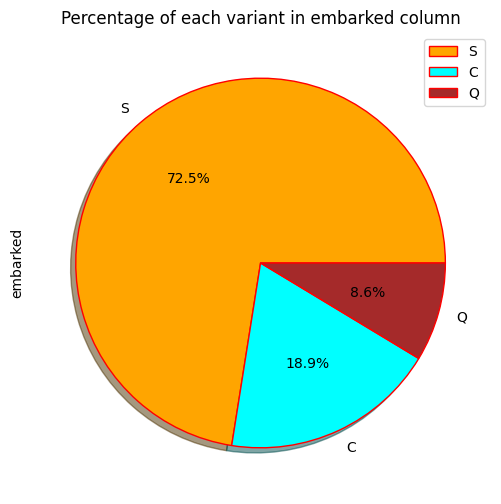

In [ ]:
figure=plt.figure(figsize=[12,6])
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "red" }
colors = ( "orange", "cyan", "brown")
df_titanic["embarked"].value_counts().plot(kind="pie",shadow = True,colors = colors,autopct='%3.1f%%',wedgeprops=wp,legend=True)
plt.title(label="Percentage of each variant in embarked column")
plt.show()

**Here why i used pie chart?** bcoz embarked is categorical variable , for categorical we can use pie,donot and bargraph. so i took pie chart.The pie chart display the out put with different percentages. For S- 72.4%, C-18.9%, Q-8.7%.Every graph has so many properties. By using those properties we can show the graph attractively.
Properties: colour - apply different colours to each sector.shadow- it shows slight shadow of the sectors. autopct- it displays precentage value of each sector.wedgeprops- it shows line width and edges colour . legend- display list of items which drawn in the graph at left corner. etc

####**Sex feature:**
**Bar graph for sex**

In [ ]:
x= df_titanic['sex'].value_counts().index.to_list()
x

['male', 'female']

In [ ]:
y=df_titanic['sex'].value_counts().values
y

array([577, 314])

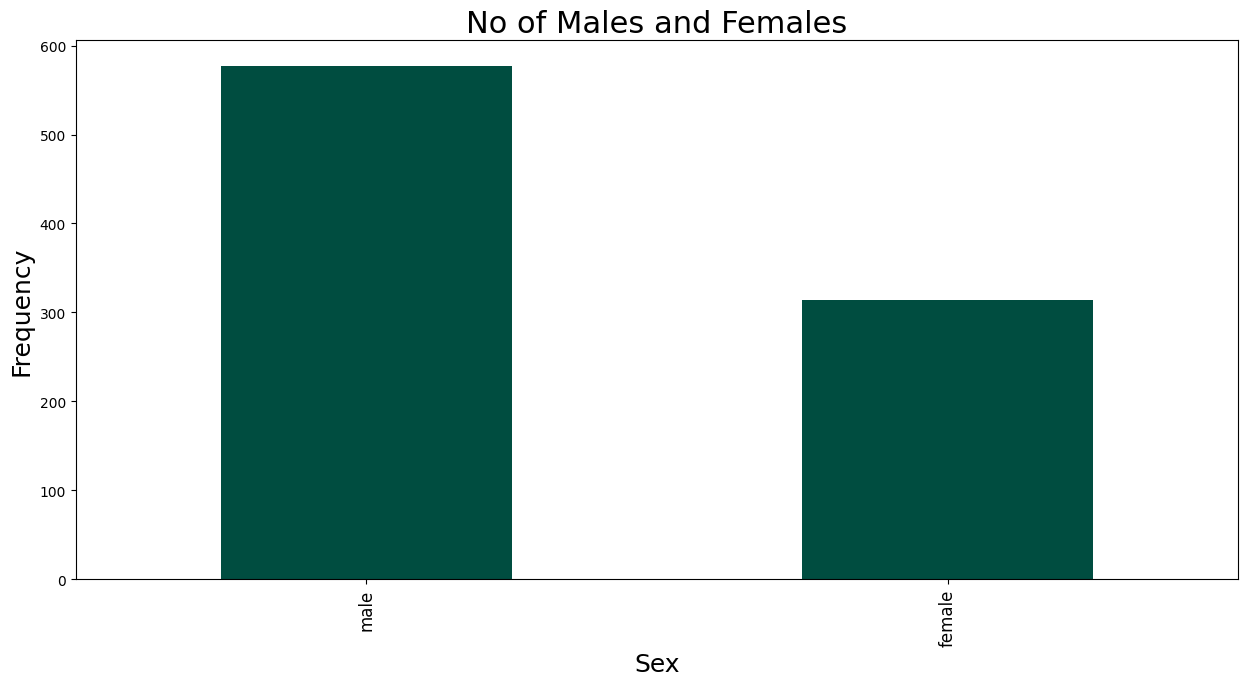

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=[15,7])

df_titanic['sex'].value_counts().plot.bar(color='#004D40')

plt.xticks(rotation=90, size =12)

plt.xlabel(xlabel='Sex', size=18)

plt.ylabel(ylabel='Frequency', size=18)

plt.title(label = "No of Males and Females" , size =22)

plt.show()

Sex is categorical variable, here we have only two variants 1)male 2)female.To compare which variant is much greater. Here males are more than females.

#### **Fare feature:**
**Histogram for Fare**

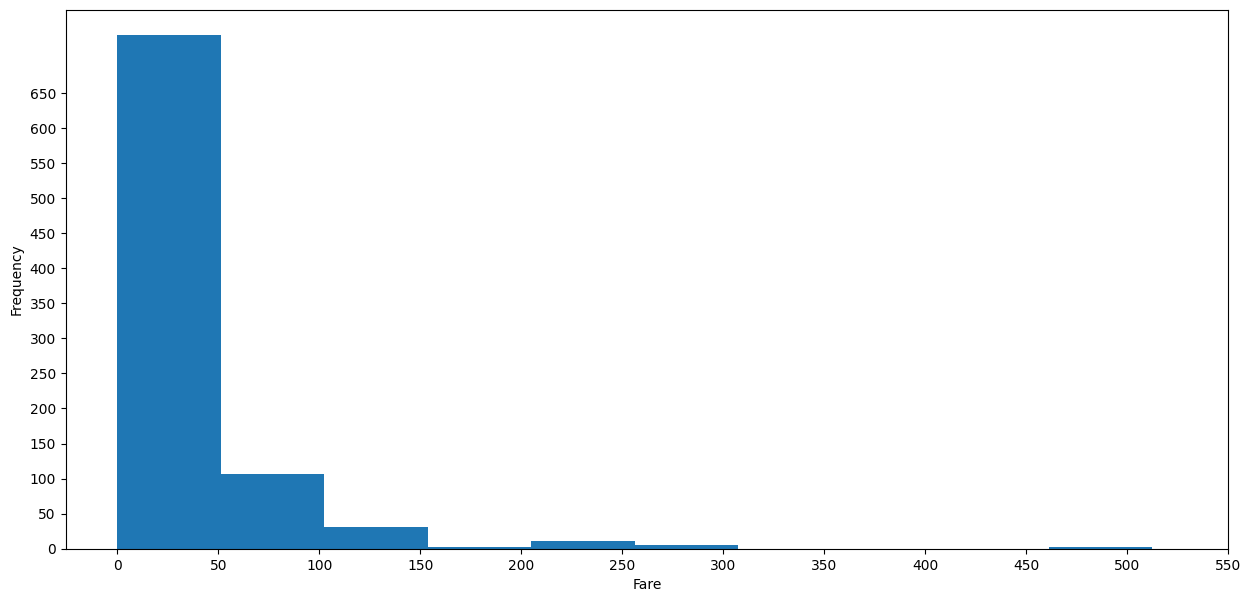

In [ ]:
figure=plt.figure(figsize=[15,7])
df_titanic["fare"].plot.hist()
plt.xlabel(xlabel="Fare")
plt.xticks(ticks=np.arange(0,600,50))
plt.yticks(ticks=np.arange(0,700,50))
plt.show()

#### **Age feature:**

In [ ]:
df_titanic["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

**KDE Graph for age column**

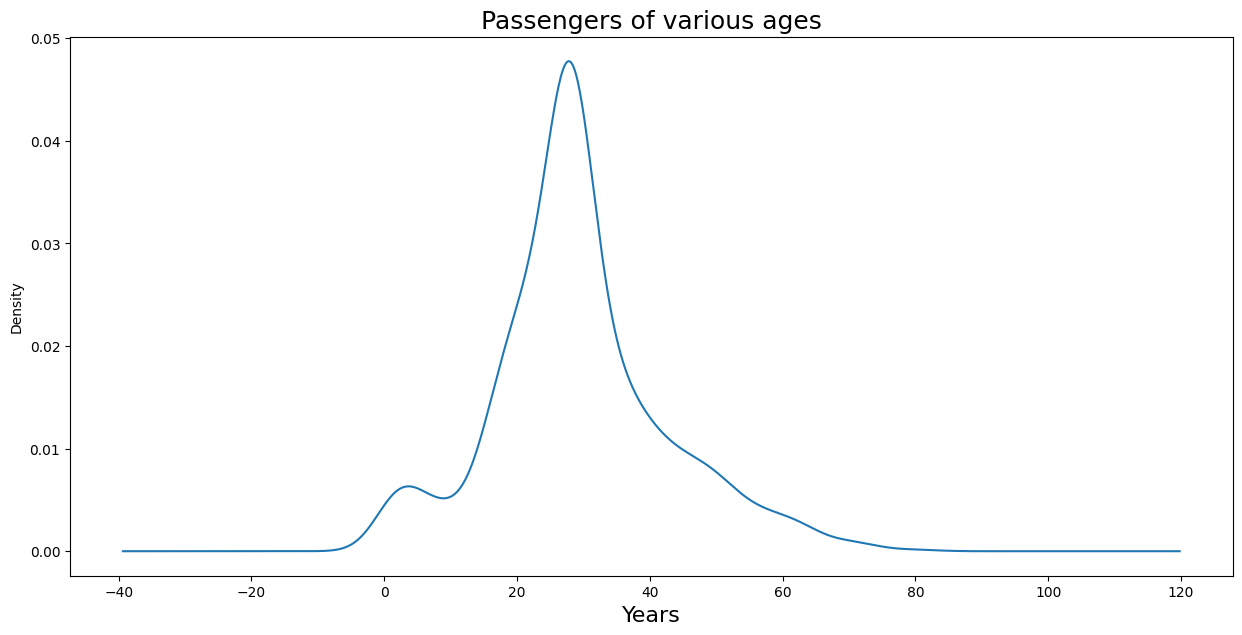

In [ ]:
figure = plt.figure(figsize=[15,7])
df_titanic["age"].plot.kde()
plt.xlabel(xlabel="Years",size=16)
plt.title(label="Passengers of various ages",size=18)
plt.show()




**Age is a continuous variable.In the KDE graph, it shows most of the passengers age who travelled in titanic were between 20 to 60 years.**

In [ ]:
#To find any duplicated values in the dataset
df_titanic[df_titanic.duplicated()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize


**To find any duplicated values in the dataset**

In [ ]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


**Describe()**: - It tells us the distribution of the numerical data of the titanic datset. Here Mean and Standard Deviation especially help us to understand the variation of the numerical data in the dataset.

**Observation:**

- The **average** age of the people in titanic was about 29 years.

- **Minimum** age seems to be between 0-1 years. Where, the **Max** age was 80.

- The **average Fare** was 32 dollars

- **25%** of **fare** was 7 dollar

#### **Pclass feature:**

In [ ]:
df_titanic["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

The second column is pclass.Here pclass contains three catogeries those are first class,second class and third class.First class have 216 seats,second class have 184 seats and third class have 491 seats.

In [ ]:
df_titanic["pclass"].nunique()

3

Show graphically total fare of which class have highest and lowest

**`Bar graph for pclass`**

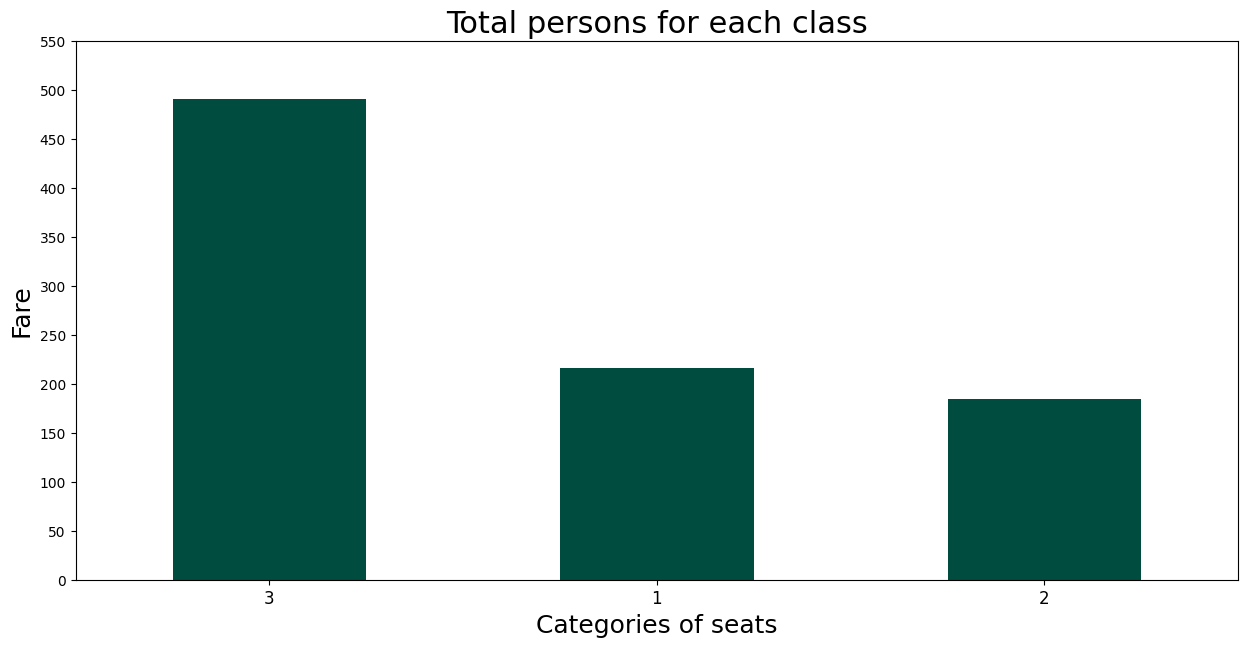

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=[15,7])

df_titanic['pclass'].value_counts().plot.bar(color='#004D40')
plt.xticks(rotation=0, size =12)
plt.xlabel(xlabel='Categories of seats', size=18)

plt.ylabel(ylabel='Fare', size=18)
plt.yticks(ticks=np.arange(0,600,50))

plt.title(label = "Total persons for each class" , size =22)

plt.show()

**In bar graph it shows the different classes of pclass in x-axis, the frequency of passengers in y-axis.At whole the output is total passengers for each  categories of pclass. The 3 class shows 491 passengers.**

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   name        891 non-null    object 
 3   sex         891 non-null    object 
 4   age         891 non-null    float64
 5   sibsp       891 non-null    int64  
 6   parch       891 non-null    int64  
 7   ticket      891 non-null    object 
 8   fare        891 non-null    float64
 9   embarked    891 non-null    object 
 10  FamilySize  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### **Survived feature:**

**<h4> What is the frequency and proportion of Survival?</h4>**

In [ ]:
df_titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'survived', data = df_titanic, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'Survival', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
df_titanic['survived'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15),
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#DB5E56','#56DB7F'])
plt.legend(['Not Survived', 'Survived'])
plt.ylabel(ylabel = 'Survived', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Survival', y = 1.02, size = 16)
plt.show()

**Observation:**

- We can observe that there are lesser number of people that **Survived**.

- Additionally, we can **observe class imbalance** in our data set.

- This might pose a **big problem** while **performing model building**, but we **will see what we can do**.

### **Bi-Variate Analysis**

####**Age and Survived**

**<h4> Is there any association between Age and Survival?</h4>**


In [ ]:
# Slicing data with non-survial
Not_Survived = df_titanic['age'][df_titanic['survived'] == 0]

# Slicing data with survival
Survived = df_titanic['age'][df_titanic['survived'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Not_Survived, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of People who did not Survive', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = Survived, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of People who Survived', size = 14)
plt.show()

**Observation:**

- We can see that the distribution of both the cases are similar.

- If you notice the second graph you will see a little rise in the bar at the starting of the graphs, as during evacuation childrens were prioritized then female and then male.

#### **Survived and Pclass**

**<h4> Is there any relation between Survived and PClass?</h4>**

In [ ]:
Not_Survived=df_titanic['pclass'][df_titanic['survived']==0]

In [ ]:
Not_Survived.value_counts()

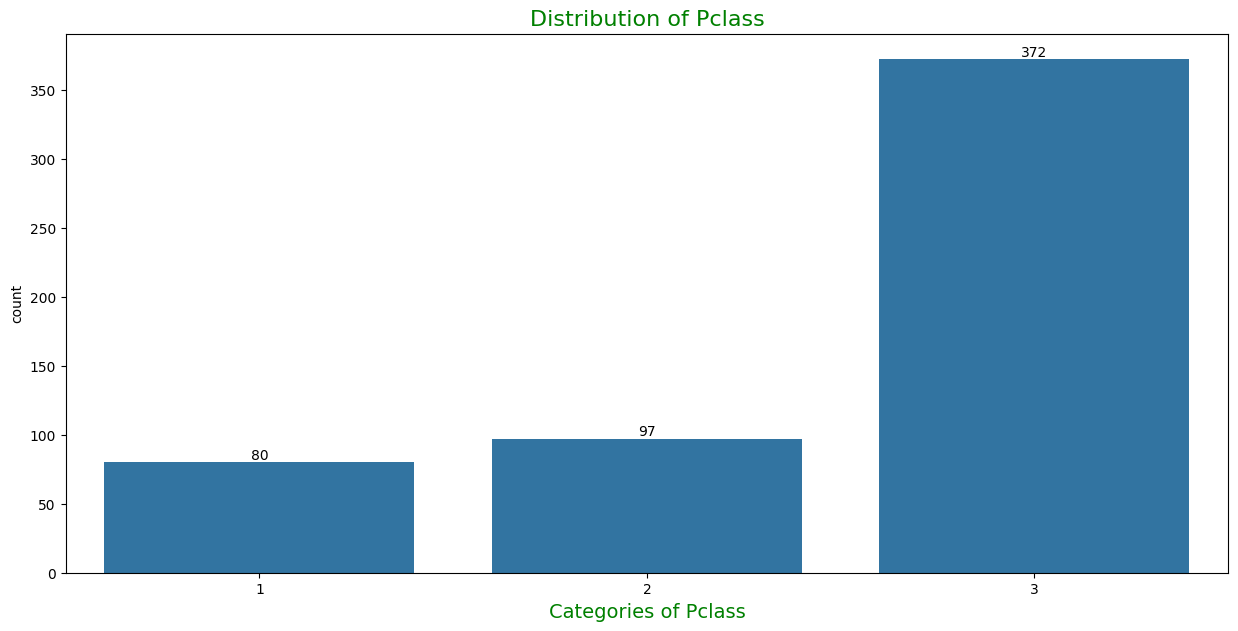

In [ ]:
figure=plt.figure(figsize=(15,7))
ax=sns.countplot(data=df_titanic,x=Not_Survived)
ax.bar_label(ax.containers[0],label_type='edge')
plt.xlabel("Categories of Pclass",size=14,color='green')
plt.title("Distribution of Pclass",size=16,color='green')
plt.show()

In [ ]:
Survived=df_titanic['pclass'][df_titanic['survived']==1]

In [ ]:
Survived.value_counts()

1    136
3    119
2     87
Name: pclass, dtype: int64

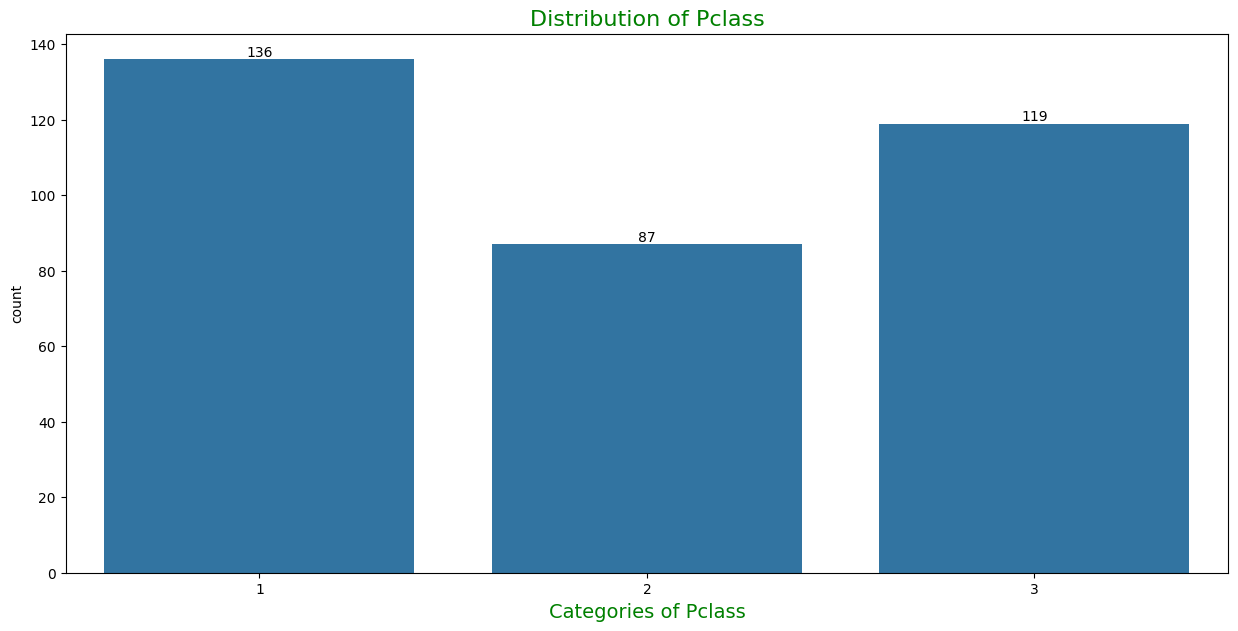

In [ ]:
figure=plt.figure(figsize=(15,7))
ax=sns.countplot(data=df_titanic,x=Survived)
ax.bar_label(ax.containers[0],label_type='edge')
plt.xlabel("Categories of Pclass",size=14,color='green')
plt.title("Distribution of Pclass",size=16,color='green')
plt.show()

**Observation:**

- We can **observe** people who did not **Survive** where mostly from Pclass 3.

- Most of the people **Survived** from Pclass 1.

####**Fare and pclass**

**<h4> Is there any relation between Fare and PClass?</h4>**

In [ ]:
df_titanic[['fare','pclass']].groupby(by = 'pclass').describe()

fare                                                              
        count       mean        std  min       25%      50%   75%       max
pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

**Observation:**

- We can **observe** that Pclass 1 belonged to the luxorious group of people where tha **max fare** is 512. No doubt, this group was given preferrence for evacuation.

**1) What was the survival rate based on passenger class (Pclass)?**

In [ ]:
survival_rate_by_class = df_titanic.groupby('pclass')['survived'].mean()
print(survival_rate_by_class)

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


**Observation:**

- We can **observe** people who did not **Survive** where mostly from Pclass 3.

- Most of the people **Survived** from Pclass 1.

**2)How did gender (Sex) impact survival?**

In [ ]:
df_titanic.groupby(by = 'sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

**Observations:** Women had a much higher survival rate (around 75%) compared to men (around 20%). Gender plays a crucial role in determining survival chances

**3)What age groups were saved?**

In [ ]:
age_groups = pd.cut(df_titanic['age'], bins=[0, 18, 35, 60, 100], labels=['Children', 'Young Adults', 'Adults', 'Elderly'])
survival_rate_by_age_group = df_titanic.groupby(age_groups)['survived'].mean()
print(survival_rate_by_age_group)

age
Children        0.503597
Young Adults    0.382682
Adults          0.400000
Elderly         0.227273
Name: survived, dtype: float64


**Observations:**  Analyzing age distribution reveals which groups—men, women, or children—were more likely to survive.Elders were unable to survive compare to all ages.

**4)Where did the passengers come from?**

In [10]:
df_titanic.embarked.value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

**Observations:** most of passengers came from 'S'

**5) Were families more likely to survive?**

In [13]:
survival_rate_by_family_size = df_titanic.groupby('FamilySize')['survived'].mean()
print(survival_rate_by_family_size)

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64




---
# **Post Data Processing & Feature Selection**
---
- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.

<a name = Section71></a>
### **Feature Selection**

- Here we will **visualize  the correlation** of input features **using Heatmap**.
- If we see a case of correlation we will **remove the highly correlated feature**.

Text(0.5, 1.0, 'Correlation between features')

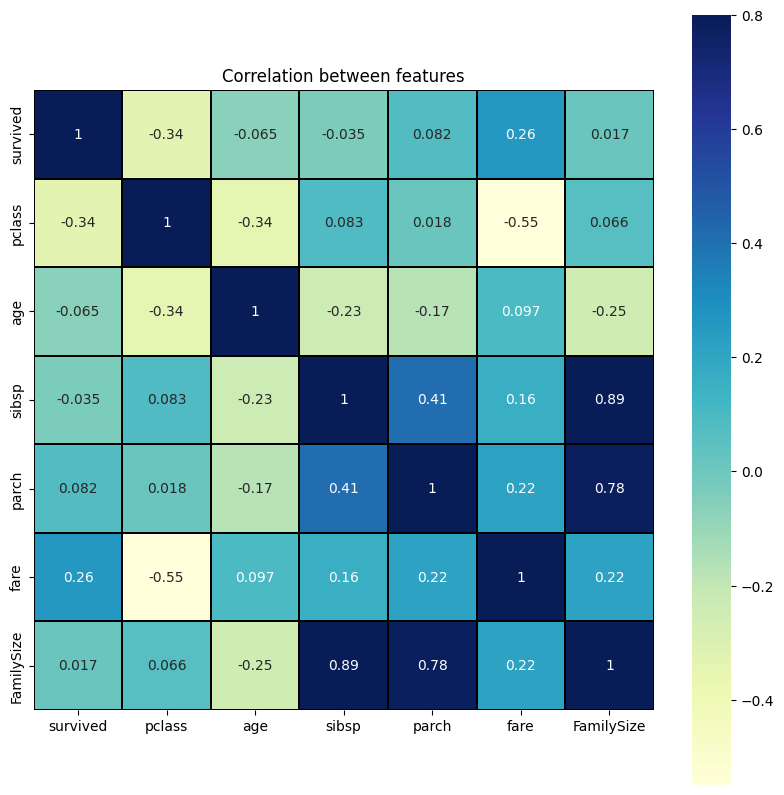

In [ ]:
corr = df_titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observation:**

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

In [ ]:
titanic = df_titanic.drop(['sibsp','parch','name','ticket'], axis = 1)
titanic.head()

,survived,pclass,sex,age,fare,embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


<a name = Section73></a>
### **Encoding Categorical Features**

In [ ]:
titanic.dtypes

survived        int64
pclass          int64
sex            object
age           float64
fare          float64
embarked       object
FamilySize      int64
dtype: object

In [ ]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [ ]:
titanic['pclass'] = titanic.pclass.astype(dtype=object)

In [ ]:
titanic.dtypes

survived        int64
pclass         object
sex            object
age           float64
fare          float64
embarked       object
FamilySize      int64
dtype: object

In [ ]:
encoded_data = pd.get_dummies(titanic)
encoded_data.head()

,survived,age,fare,FamilySize,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,22.0,7.2500,2,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,2,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,2,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,0,1,0,0,1


###**Data Preparation**

Now we will **split** our **data** in **training** and **testing** part for further development.

In [ ]:
x= encoded_data.drop('survived',axis=1)
y = encoded_data['survived']

In [ ]:
x.head()

,age,fare,FamilySize,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,22.0,7.2500,2,0,0,1,0,1,0,0,1
1,38.0,71.2833,2,1,0,0,1,0,1,0,0
2,26.0,7.9250,1,0,0,1,1,0,0,0,1
3,35.0,53.1000,2,1,0,0,1,0,0,0,1
4,35.0,8.0500,1,0,0,1,0,1,0,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42,stratify=y)

In [ ]:
print('Training Data Shape:',x_train.shape,y_train.shape)
print("Testing Data Shape: ",x_test.shape,y_test.shape)

Training Data Shape: (801, 11) (801,)
Testing Data Shape:  (90, 11) (90,)


###**Model Developmeent and Evaluation**

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**, also we will check for **Precision**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Score**.

#### **Logistic Regression - Baseline Model**

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

#### **Trianed Model for Prediction**

In [ ]:
y_pred_train=logreg.predict(x_train)   #predicting on train data
y_pred_test=logreg.predict(x_test)     #predicting on test data

In [ ]:
y_pred_train

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
y_train

list[86     0
329    1
517    0
844    0
408    0
      ..
141    1
736    0
462    0
526    1
307    1
Name: survived, Length: 801, dtype: int64]

In [ ]:
y_pred_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

In [ ]:
y_test

530    1
401    0
433    0
241    1
773    0
      ..
369    1
553    1
115    0
752    0
690    1
Name: survived, Length: 90, dtype: int64

####**Logistic Regression Model Evaluation**

##### Checking Confusion Matrix
- A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

- The **number of correct and incorrect predictions** are summarized with count values and **broken down by each class**. <br/>
Below is a diagram showing a general confusion matrix.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/confusion%20total%20matrix.png" width="500" height="300" /></center>


- **True Positive (TP)** : Observation is positive, and is predicted to be positive.
- **False Negative (FN)** : Observation is positive, but is predicted negative.
- **True Negative (TN)** : Observation is negative, and is predicted to be negative.
- **False Positive (FP)** : Observation is negative, but is predicted positive.

In [ ]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  45                  10
Actual Survived              11                  24


**Observations**
- True Positive(TP) = 45
- True Negative(TN) = 24
- False Positive(FP) = 11
- False Negative(FN) = 10

####**Checking Accuracy**

In [ ]:
pred=logreg.predict(x_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred))


Accuracy score for test data is: 0.7666666666666667


### **Conclusion**


- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **explored** some **questions related** to survive and not survived.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** who survived and who did not survive.